### Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

In [9]:
x_train[0].shape

(32, 32, 3)

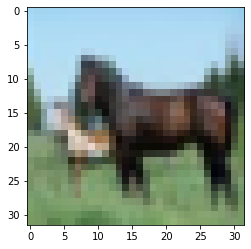

In [10]:
plt.imshow(x_train[12]);

In [11]:
x_train = x_train/255

In [12]:
x_test = x_test/255

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train,10)

In [15]:
y_cat_test = to_categorical(y_test,10)

### Creating Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [17]:
model = Sequential()

#Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu' ))

#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

#Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu' ))

#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

#Output Layer
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [21]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test,y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 46s 29ms/step - loss: 1.5330 - accuracy: 0.4424 - val_loss: 1.3085 - val_accuracy: 0.5367
Epoch 2/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1914 - accuracy: 0.5755 - val_loss: 1.1724 - val_accuracy: 0.5846
Epoch 3/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0358 - accuracy: 0.6345 - val_loss: 1.0878 - val_accuracy: 0.6306
Epoch 4/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9276 - accuracy: 0.6761 - val_loss: 1.0084 - val_accuracy: 0.6495
Epoch 5/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8347 - accuracy: 0.7076 - val_loss: 0.9482 - val_accuracy: 0.6697
Epoch 6/15
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7537 - accuracy: 0.7367 - val_loss: 0.9513 - val_accuracy: 0.6746
Epoch 7/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6822 - accuracy: 0.7618 - val_loss: 0.9690 -

In [22]:
metrics = pd.DataFrame(model.history.history)

In [23]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.533003,0.44242,1.308481,0.5367
1,1.191393,0.57552,1.172432,0.5846
2,1.035760,0.63454,1.087808,0.6306
3,0.927610,0.67606,1.008402,0.6495
4,0.834711,0.70760,0.948154,0.6697
5,0.753735,0.73670,0.951326,0.6746
6,0.682239,0.76182,0.968951,0.6699


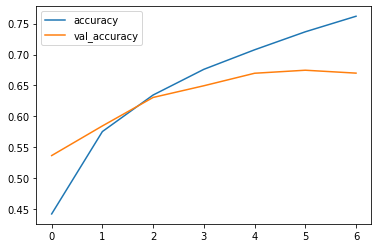

In [24]:
metrics[['accuracy','val_accuracy']].plot();

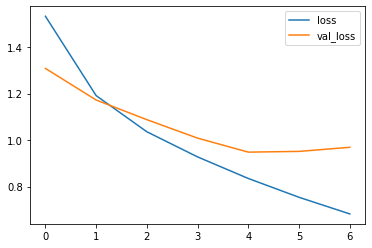

In [25]:
metrics[['loss','val_loss']].plot();

In [26]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.9689505100250244, 0.6699000000953674]

### Results

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
predictions = model.predict_classes(x_test)

In [29]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [30]:
predictions

array([3, 8, 8, ..., 5, 0, 7])

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1000
           1       0.79      0.79      0.79      1000
           2       0.65      0.49      0.56      1000
           3       0.45      0.51      0.48      1000
           4       0.63      0.65      0.64      1000
           5       0.52      0.59      0.55      1000
           6       0.81      0.70      0.75      1000
           7       0.67      0.75      0.71      1000
           8       0.78      0.76      0.77      1000
           9       0.78      0.73      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [32]:
confusion_matrix(y_test, predictions)

array([[734,  28,  45,  26,  23,   8,   6,  15,  93,  22],
       [ 28, 790,   9,  18,   3,   5,   8,  13,  39,  87],
       [ 78,   7, 492, 101, 102,  99,  50,  48,  13,  10],
       [ 26,  11,  47, 507,  72, 209,  28,  72,  11,  17],
       [ 27,   6,  46,  66, 651,  68,  33,  90,  11,   2],
       [ 21,   5,  37, 206,  48, 587,  12,  76,   5,   3],
       [  9,  10,  35, 103,  52,  57, 697,  22,   5,  10],
       [ 16,   3,  23,  50,  62,  73,   7, 750,   4,  12],
       [ 95,  30,  13,  22,  10,   9,   8,  11, 764,  38],
       [ 33, 112,  14,  26,   6,   8,   9,  27,  38, 727]])

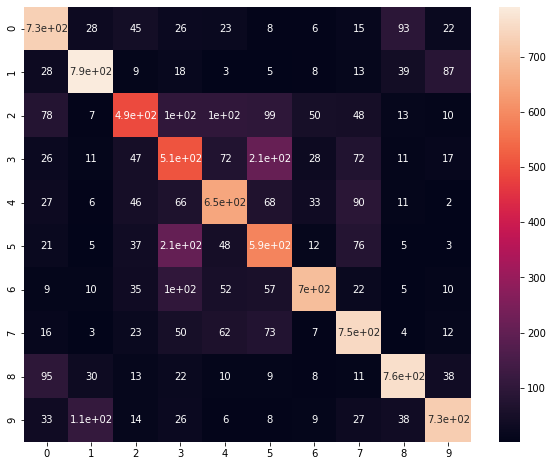

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True);

In [34]:
test_img = x_test[0]

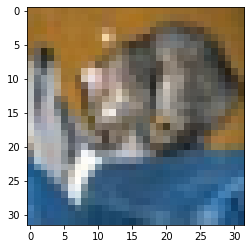

In [35]:
plt.imshow(test_img);

In [36]:
model.predict_classes(test_img.reshape(1,32,32,3))

array([3])